In [1]:
import numpy as np
import random
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from numpy import *

## Аналитический метод

In [2]:
def solve_analytical(game_params):
    R = game_params['R']
    r = game_params['r']
    
    p = (2*R + r) / 2
    
    r = math.sqrt(p*((p-R)**2)*(p-r)) * 2 / R
    
    return game_params['n'] / 2 * (1 - math.sqrt(1 - (r / R)**2))

## Cлучайная точка на сфере

In [3]:
def rand_sphere_point(R = 1):
    y = random.uniform(-1, 1)
    alpha = random.uniform(0, 2 * math.pi)
    
    r = math.sqrt(1 - y**2) 
    
    x = r * math.cos(alpha)
    z = r * math.sin(alpha)
    
    return (R * x, R * y, R * z)

## Визуальная проверка равномерности распределения

In [4]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = np.array([rand_sphere_point() for i in range(500)])

trace1 = go.Scatter3d(
    x=data[:,0],
    y=data[:,1],
    z=data[:,2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=1
        ),
        opacity=0.8
    )
)
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='simple-3d-scatter')

## Численное решение

In [5]:
TESTS_COUNT = 10000
RANDOM_STRATS_COUNT = 20

def distane(lhs, rhs):
    if len(rhs) != len(rhs) or len(lhs) < 1:
        raise Exception('Cant aclculate distance')
        
    summ = 0
    
    return math.sqrt(sum((np.array(lhs) - np.array(rhs))**2))

def solve_iterative(game_params, finder_points):
    K = 0
    
    R = game_params['R']
    r = game_params['r']
    
    for i in range(TESTS_COUNT):
        hider_point = rand_sphere_point(R)
        
        for p in finder_points:
            if (distane(p, hider_point)) <= r:
                K += 1
                break
    
    return K / TESTS_COUNT

def find_best_iterative(game_params):
    n = game_params['n']
    R = game_params['R']
    
    best_K = 0
    best_points = []
    
    for i in range(RANDOM_STRATS_COUNT):
        finder_points = [rand_sphere_point(R) for i in range(n)]
        K = solve_iterative(game_params, finder_points)
        
        if K > best_K:
            best_K = K
            best_points = finder_points
            
    return {
        'cost' : best_K,
        'strategy' : best_points
    }

## Конкретные параметры

In [6]:
game_params = {
    'R' : 1,
    'r' : 1.6,
    'n' : 1
}
print(round(find_best_iterative(game_params)['cost'], 3))
print(round(solve_analytical(game_params), 3))

0.647
0.36


In [7]:
def draw_strategy(game_params, strategy):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')

    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    
    R = game_params['R']
    r = game_params['r']
    
    ax.plot_surface(R * x, R * y, R * z, rstride=4, cstride=4, color='b', alpha=0.2)
    
    for point in strategy:
        ax.plot_surface(r * x + point[0],
                        r * y + point[1],
                        r * z + point[2],
                        rstride=4,
                        cstride=4,
                        color='r',
                        alpha=0.2)
        
    plt.show()

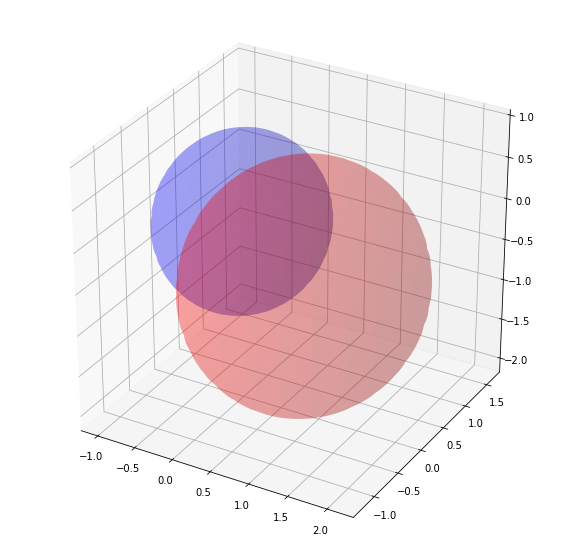

0.505
0.5


In [8]:
game_params = {
    'R' : 1,
    'r' : math.sqrt(2),
    'n' : 1
}

iterative = find_best_iterative(game_params)

draw_strategy(game_params, iterative['strategy'])

print(round(iterative['cost'], 3))
print(round(solve_analytical(game_params), 3))

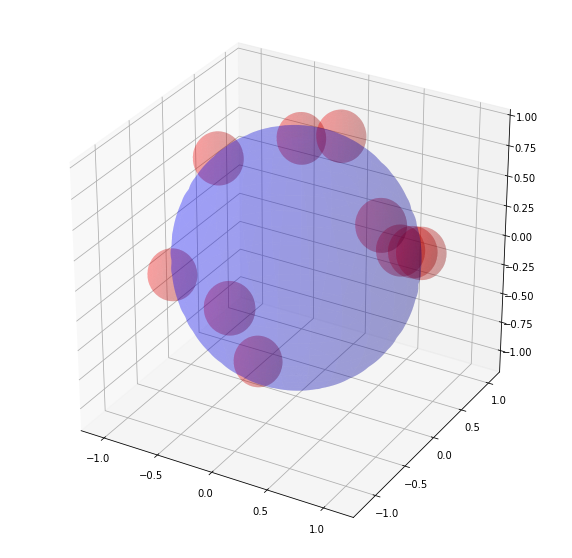

0.103
0.1


In [9]:
game_params = {
    'R' : 1,
    'r' : 0.2,
    'n' : 10
}

iterative = find_best_iterative(game_params)

draw_strategy(game_params, iterative['strategy'])

print(round(iterative['cost'], 3))
print(round(solve_analytical(game_params), 3))

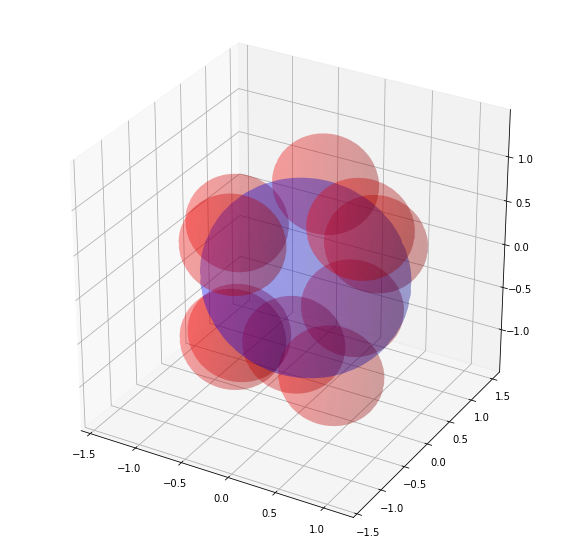

0.567
0.625


In [10]:
game_params = {
    'R' : 1,
    'r' : 0.5,
    'n' : 10
}

iterative = find_best_iterative(game_params)

draw_strategy(game_params, iterative['strategy'])

print(round(iterative['cost'], 3))
print(round(solve_analytical(game_params), 3))

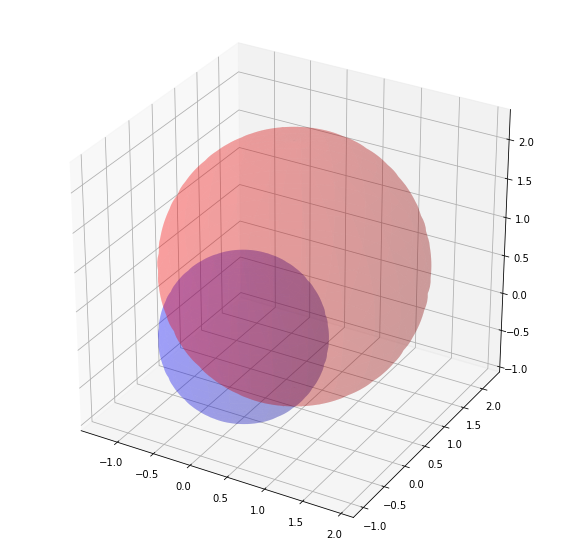

0.652
0.36


In [11]:
game_params = {
    'R' : 1,
    'r' : 1.6,
    'n' : 1
}

iterative = find_best_iterative(game_params)

draw_strategy(game_params, iterative['strategy'])

print(round(iterative['cost'], 3))
print(round(solve_analytical(game_params), 3))